## Preamble

In [1]:
import numpy as np
from numpy import sqrt, pi, sin, cos, exp
import scipy.constants as consts
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/liang/src/')
import xenon
from importlib import reload  
xenon = reload(xenon)
print(xenon.__file__)

/home/liang/src/xenon/__init__.py


In [3]:
# %matplotlib notebook
%matplotlib inline

## Gary Fig 2.6

In [4]:
epsilon0 = 1.0
q = 1.0
me = 1.0
n = 1.0
Te = 1.0
we__wce = 10.0  # electron plasma freq vs cyclotron freq
mi__me = 1836.0
Ti__Te = 1.0

qe, qi = -q, q
mi = me * mi__me

we = sqrt(n * qe**2 / me / epsilon0)
wi = sqrt(n * qi**2 / mi / epsilon0)

wce = we / we__wce
B = abs(wce * me / qe)
wci = abs(B * qi / mi)

Ti = Te * Ti__Te

pe = n * Te
vte = sqrt(Te / me)

pi = n * Ti
vti = sqrt(Ti / mi)

# Debye lengths
lame = vte / we
lami = vti / wi

ke = 1.0 / lame
ki = 1.0 / lami

ae = vte / wce
ai = vti / wci

print(f'plasma frequencies = {we:g}, {wi:g}')
print(f'cyclotron frequencies = {wce:.2e}, {wci:.2e}')
print(f'Debye lenghts = {lame:g}, {lami:g}')
print(f'gyro-radii = {ae:g}, {ai:g}')

plasma frequencies = 1, 0.023338
cyclotron frequencies = 1.00e-01, 5.45e-05
Debye lenghts = 1, 1
gyro-radii = 10, 428.486


In [5]:
params = dict(epsilon0=epsilon0, Bz=B)

species = [
    [qe, me, n, 0, 0, pe, pe],
    [qi, mi, n, 0, 0, pi, pi],
]

dr_args_vlasov = dict(
    species=species,
    params=params,
    isMag=[True, True],
    N=12,
    convergence_thresh=0.975,
    sort='imag',
)

In [6]:
k0 = 1/ai
knorm_name = 'a_i'
w0 = wci
wnorm_name = '/\Omega_{i}'

In [7]:
# 0, 45, 85
theta = np.pi / 180.0 * 45
ks = np.linspace(0, 1, 30)[1:] * k0
kxs = ks * sin(theta)
kzs = ks * cos(theta)

In [8]:
ws = xenon.vlasov.k2w_es3d(kxs, kzs, dry_run=False, **dr_args_vlasov)

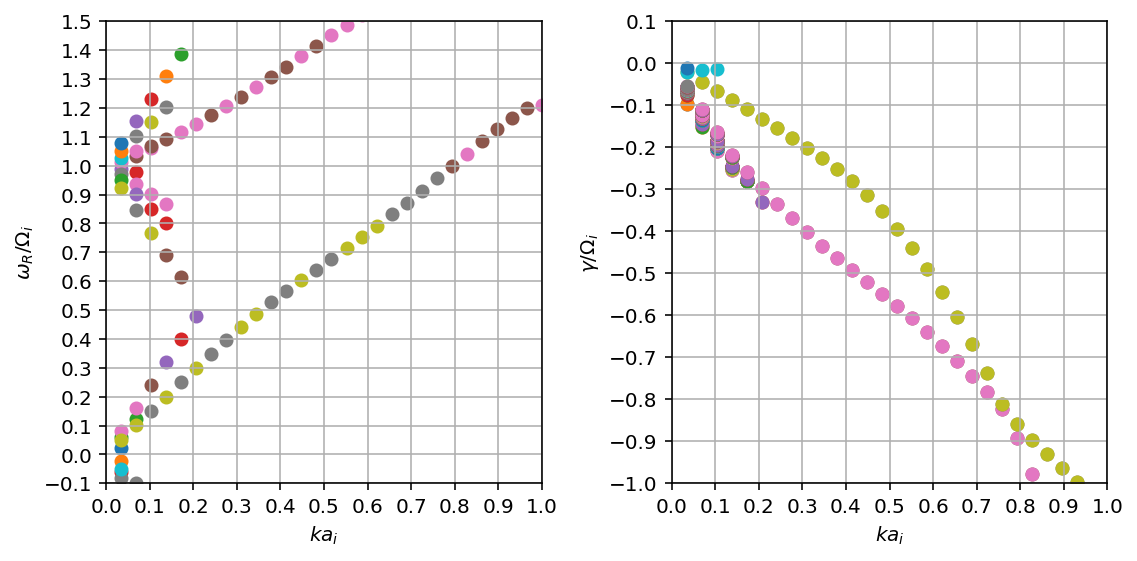

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=144, sharex=True)


def wi_mask_func2(k, wi):
    k0, wi0 = 0, 0
    k1, wi1 = 1, -0.1
    return wi < (k - k0) * (wi1 - wi0) / (k1 - k0) + wi0


wi_mask_funcs = [
    xenon.common.BorderLine([
        [0, -0.1],
        [0.8, -1],
        [1, -1.56],
    ]).mask_func_above_line,
    wi_mask_func2,
]


def wri_mask_func(wr, wi):
    return (wr < 5) & (wr > -0.1)  # & (wi < 0.1) & (wi > -5)


wri_mask_funcs = []

xenon.common.plot_dr(ks,
                     ws,
                     knorm=k0,
                     wnorm=w0,
                     knorm_name=knorm_name,
                     wnorm_name=wnorm_name,
                     wi_mask_funcs=wi_mask_funcs,
                     wri_mask_funcs=wri_mask_funcs,
                     ax0=axs[0],
                     ax1=axs[1])

ax = axs[0]
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1.5)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

ax = axs[1]
ax.set_ylim(-1, 0.1)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

for ax in axs:
    ax.grid()

fig.tight_layout()